In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Heart.csv')
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
df.drop(columns=['Thal','Unnamed: 0','ChestPain','Fbs','RestECG','MaxHR','ExAng','Oldpeak','Slope','Ca'],inplace=True)

In [4]:
df.head()

,Age,Sex,RestBP,Chol,AHD
0,63,1,145,233,No
1,67,1,160,286,Yes
2,67,1,120,229,Yes
3,37,1,130,250,No
4,41,0,130,204,No


In [5]:
df.rename(columns={'RestBP' : 'BP'},inplace=True)

In [6]:
df.head()

,Age,Sex,BP,Chol,AHD
0,63,1,145,233,No
1,67,1,160,286,Yes
2,67,1,120,229,Yes
3,37,1,130,250,No
4,41,0,130,204,No


In [7]:
X = df.drop('AHD',axis=1)
Y = df['AHD']

In [8]:
X.head()

,Age,Sex,BP,Chol
0,63,1,145,233
1,67,1,160,286
2,67,1,120,229
3,37,1,130,250
4,41,0,130,204


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train.shape,X_test.shape

((203, 4), (100, 4))

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [13]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [16]:
grid_search.fit(X_train, Y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [17]:
grid_search.best_score_

0.7047058823529413

In [18]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

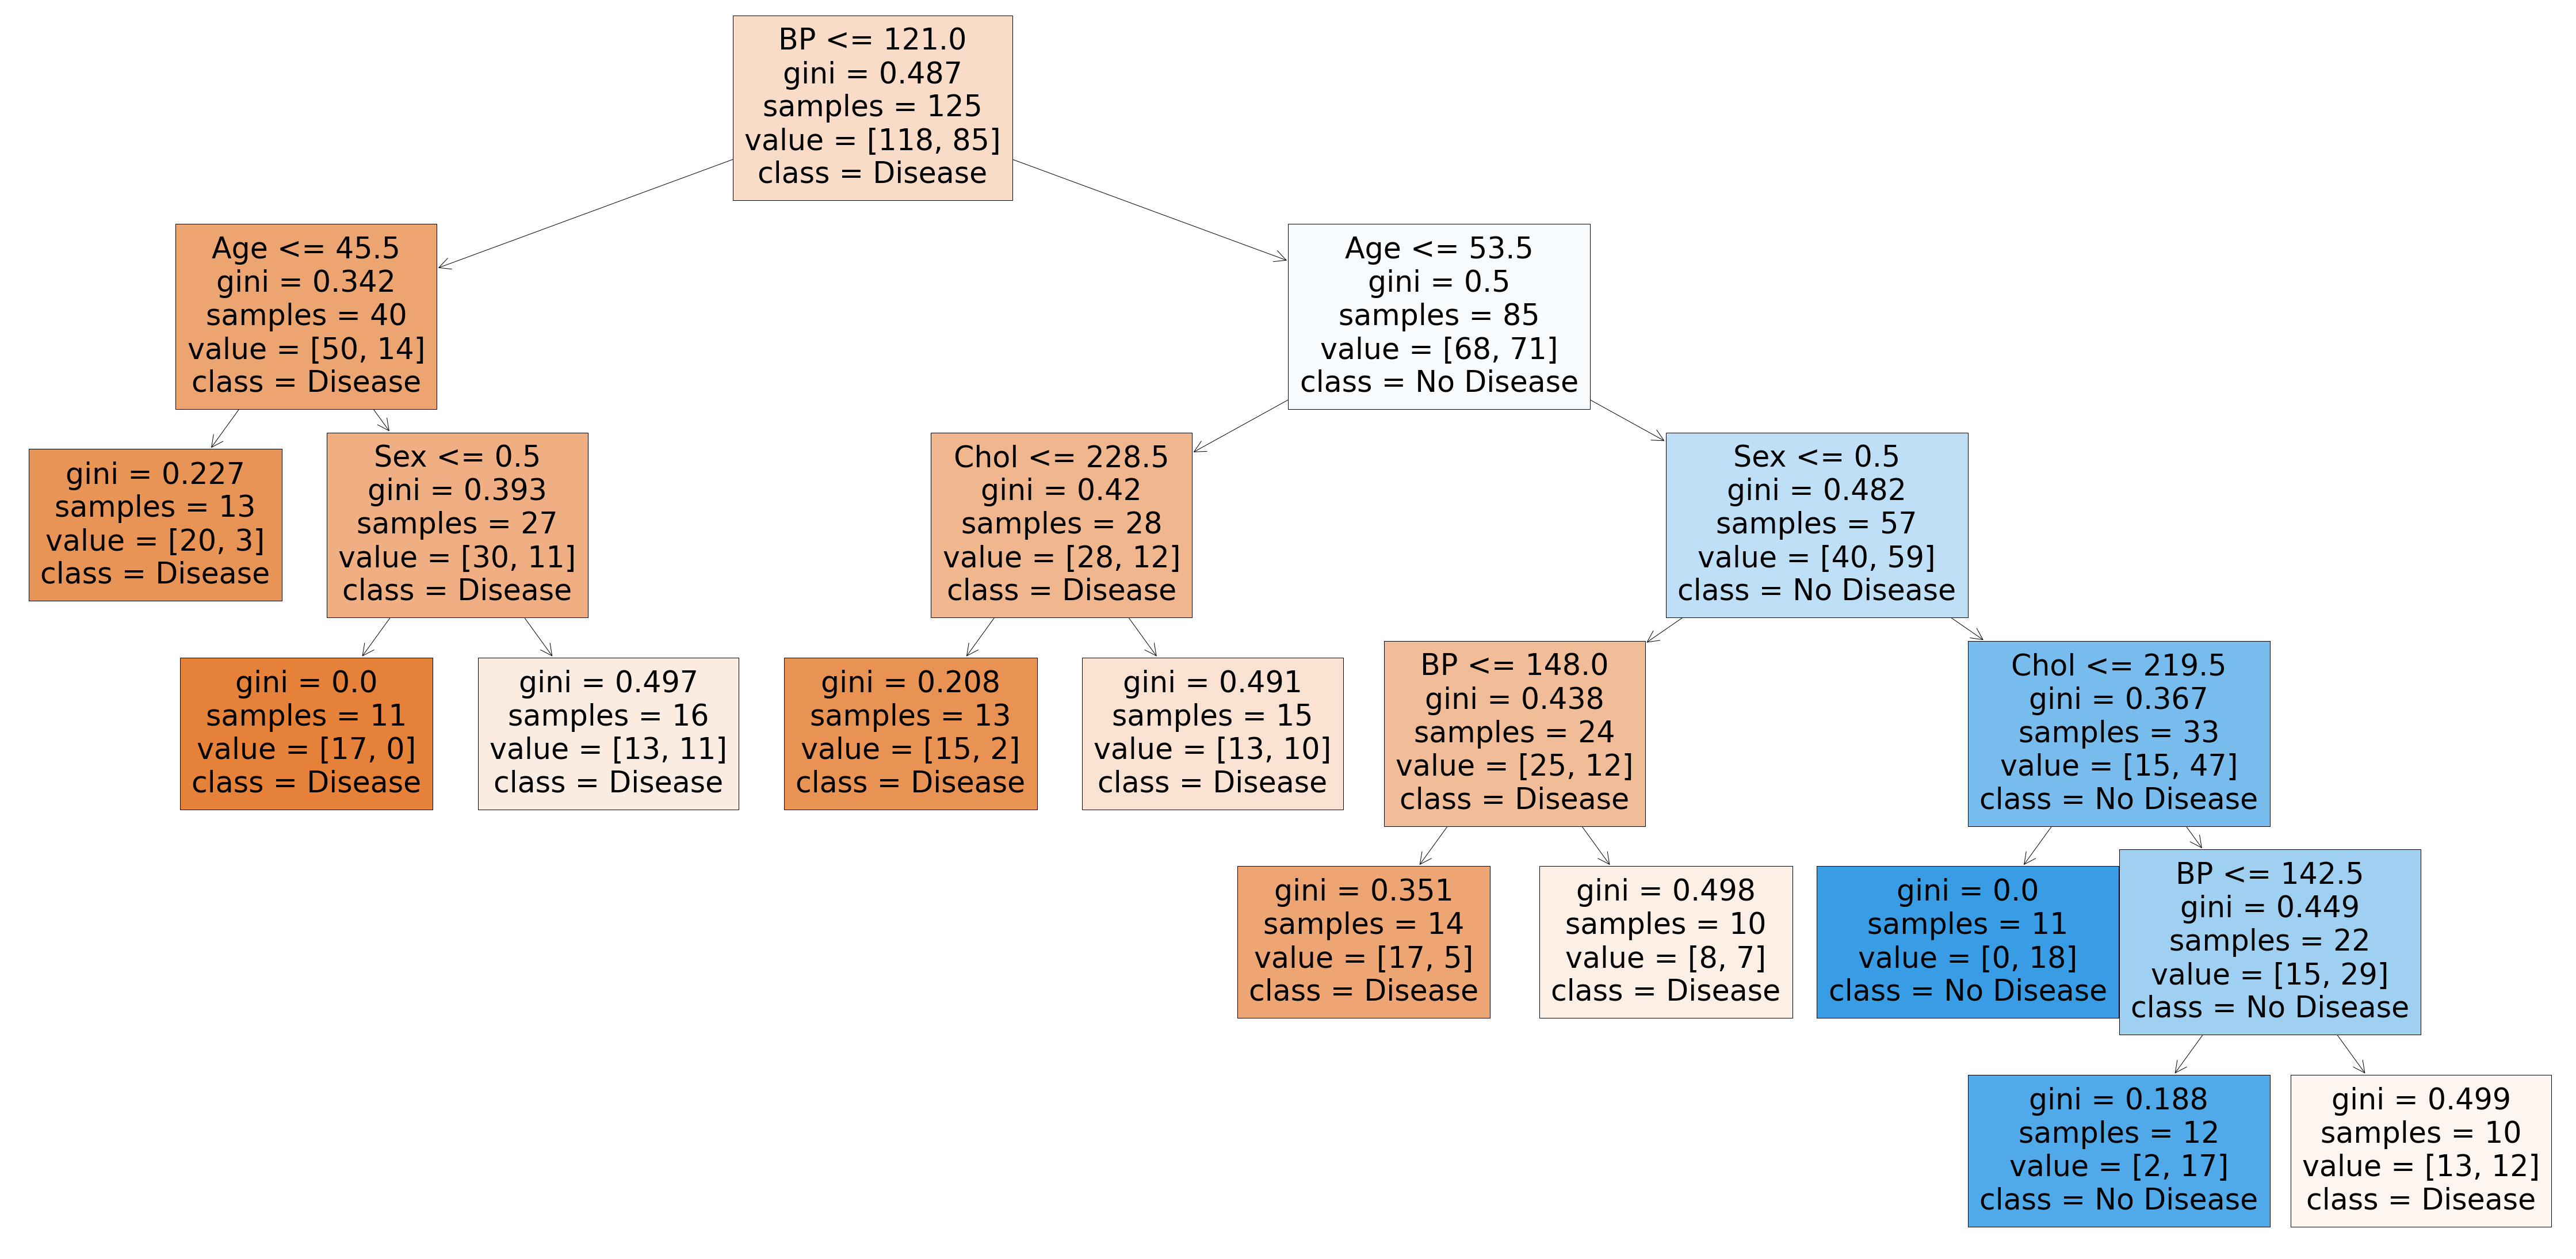

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);
